In [1]:
# Importing all the necessary libraries and modules for the notebook

import time
import datetime
import seaborn as sns
import tensorflow as tf
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from skimage import transform
from skimage.color import rgb2gray
import io
import scipy.misc
import imageio
import csv
import os
import matplotlib
from os import listdir

In [2]:
startTime = time.time()

In [3]:
# Reading the preprocessed data just to get the names of the columns needed to extract features from the .tfrec data set 

preprocessed_data_dir = r'E:\DataSets\ChestXRay\preprocessed_data.csv'
outputs = pd.read_csv(preprocessed_data_dir)

In [4]:
columns = outputs.columns[1:]
print(columns)

Index(['No Finding', 'Atelectasis', 'Consolidation', 'Infiltration',
       'Pneumothorax', 'Edema', 'Emphysema', 'Fibrosis', 'Effusion',
       'Pneumonia', 'Pleural_Thickening', 'Cardiomegaly', 'Nodule', 'Mass',
       'Hernia'],
      dtype='object')


In [5]:
data_dir = r'E:\DataSets\ChestXRay\data'
file_names = listdir(data_dir)

In [6]:
# Making the feature map to extract the features

feature_map = {}
for label in list(columns):
    feature_map[label] = tf.io.FixedLenFeature([], tf.int64)
feature_map['image'] = tf.io.FixedLenFeature([], tf.string)


In [7]:
def parse_image_function(x):
    return tf.io.parse_single_example(x, feature_map)

In [8]:
# Returns the images and labels associated with a certain .tfrec file name in the data set

def read_images_labels(file_name):
    parsed_file = tf.data.TFRecordDataset(os.path.join(data_dir, file_name)).map(parse_image_function)
    images = []
    labels = []
    for image_features in parsed_file:
        image = image_features['image']
        image = tf.io.decode_jpeg(image_features['image'], channels = 1)
        images.append(image)
        label = []
        for item in list(columns):
            label.append(image_features[item])
        labels.append(label)
    return np.array(images), np.array(labels)

In [9]:
# Converting the .tfrec to images and extracting the labels into a pandas dataframe

i = 0
img_dir = r'E:\DataSets\ChestXRay\ImageData'
data_frame_dir = r'E:\DataSets\ChestXRay\Data.csv'
all_labels = []
for file_name in file_names:
    currImages = []
    currLabels = []
    currImages, currLabels = read_images_labels(file_name)
    for image in currImages:
        img = Image.fromarray(np.squeeze(image, axis = 2), 'L')
        img = img.resize((384, 384))
        img.save(img_dir + "\\" + str(i) + ".jpeg")
        i = i + 1
    for item in currLabels:
        all_labels.append(item)
    print(f"Finished file {file_names.index(file_name) + 1} out of {len(file_names)} files")

Finished file 1 out of 256 files
Finished file 2 out of 256 files
Finished file 3 out of 256 files
Finished file 4 out of 256 files
Finished file 5 out of 256 files
Finished file 6 out of 256 files
Finished file 7 out of 256 files
Finished file 8 out of 256 files
Finished file 9 out of 256 files
Finished file 10 out of 256 files
Finished file 11 out of 256 files
Finished file 12 out of 256 files
Finished file 13 out of 256 files
Finished file 14 out of 256 files
Finished file 15 out of 256 files
Finished file 16 out of 256 files
Finished file 17 out of 256 files
Finished file 18 out of 256 files
Finished file 19 out of 256 files
Finished file 20 out of 256 files
Finished file 21 out of 256 files
Finished file 22 out of 256 files
Finished file 23 out of 256 files
Finished file 24 out of 256 files
Finished file 25 out of 256 files
Finished file 26 out of 256 files
Finished file 27 out of 256 files
Finished file 28 out of 256 files
Finished file 29 out of 256 files
Finished file 30 out of

Finished file 239 out of 256 files
Finished file 240 out of 256 files
Finished file 241 out of 256 files
Finished file 242 out of 256 files
Finished file 243 out of 256 files
Finished file 244 out of 256 files
Finished file 245 out of 256 files
Finished file 246 out of 256 files
Finished file 247 out of 256 files
Finished file 248 out of 256 files
Finished file 249 out of 256 files
Finished file 250 out of 256 files
Finished file 251 out of 256 files
Finished file 252 out of 256 files
Finished file 253 out of 256 files
Finished file 254 out of 256 files
Finished file 255 out of 256 files
Finished file 256 out of 256 files


In [10]:
df = pd.DataFrame(all_labels)
df.to_csv(data_frame_dir)

In [11]:
columns = columns.insert(0, 'id')

In [12]:
df = pd.read_csv(data_frame_dir)
df.columns = columns
df['id'] = [str(i) + '.jpeg' for i in range(len(df))] 

In [13]:
df.head()

,id,No Finding,Atelectasis,Consolidation,Infiltration,Pneumothorax,Edema,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass,Hernia
0,0.jpeg,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.jpeg,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
2,2.jpeg,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3.jpeg,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4.jpeg,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
# Plotting a pie chart for the labeled data to visualize it

label_data = []
i = 0
for column in columns[1:]:
    for item in df[column]:
        if item != 0:
            i += 1
    label_data.append(i)
    i = 0

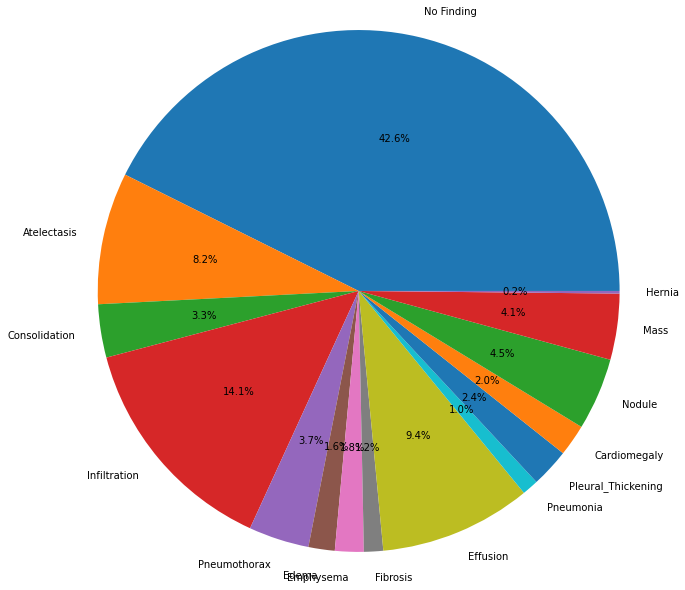

In [15]:
plt.pie(label_data, labels = columns[1:], radius = 3, autopct='%1.1f%%')
plt.show()

In [16]:
# Creating the generator and splitting the dataframe for training and testing (The data is homogeneous and isotropic)

from keras_preprocessing.image import ImageDataGenerator

In [17]:
traindf = (df[:100000])

In [18]:
testdf = (df[100000:])

In [19]:
df.dtypes

id                    object
No Finding             int64
Atelectasis            int64
Consolidation          int64
Infiltration           int64
Pneumothorax           int64
Edema                  int64
Emphysema              int64
Fibrosis               int64
Effusion               int64
Pneumonia              int64
Pleural_Thickening     int64
Cardiomegaly           int64
Nodule                 int64
Mass                   int64
Hernia                 int64
dtype: object

In [20]:
datagen = ImageDataGenerator(validation_split = 0.2)

In [21]:
train_generator = datagen.flow_from_dataframe(
    dataframe = traindf,
    directory = "E:\DataSets\ChestXRay\ImageData",
    x_col = 'id',
    y_col = columns[1:],
    batch_size = 32,
    seed = 42,
    shuffle = True,
    subset = 'training',
    class_mode = 'raw',
    target_size = (384, 384)
)

Found 80000 validated image filenames.


In [22]:
valid_generator = datagen.flow_from_dataframe(
    dataframe = traindf,
    directory = "E:\DataSets\ChestXRay\ImageData",
    x_col = 'id',
    y_col = columns[1:],
    batch_size = 32,
    seed = 42,
    shuffle = True,
    subset = 'validation',
    class_mode = 'raw',
    target_size = (384, 384)
)

Found 20000 validated image filenames.


In [23]:
test_generator = ImageDataGenerator().flow_from_dataframe(
    dataframe = testdf,
    directory = "E:\DataSets\ChestXRay\ImageData",
    x_col = 'id',
    y_col = columns[1:],
    batch_size = 32,
    seed=42,
    shuffle=False,
    class_mode='raw',
    target_size = (384, 384)
)

Found 12120 validated image filenames.


In [24]:
# Importing model libraries and creating it

from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.efficientnet import EfficientNetB1

In [25]:
eff = EfficientNetB1(include_top = False, input_shape = (384, 384, 3))
for layer in eff.layers:
    layer.trainable = False

model = Sequential()
model.add(eff)
model.add(GlobalAveragePooling2D())
model.add(layers.Flatten())
model.add(Dense(2048, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(15, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb1 (Functional)  (None, 12, 12, 1280)      6575239   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
flatten (Flatten)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 2048)              2623488   
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0

In [26]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.MeanSquaredError(), metrics = [tf.keras.metrics.AUC(name="auc"), 'accuracy'])

In [27]:
# Using callbacks to help the training process

from tensorflow.keras import callbacks
plateau = callbacks.ReduceLROnPlateau(monitor='val_loss',
                                     patience = 1,
                                     factor = 0.01,
                                     min_lr = 0.0001,
                                     mode = 'min')

early_stopping = callbacks.EarlyStopping(monitor = 'val_loss',
                                        patience = 2,
                                        restore_best_weights=True,
                                        mode = 'max')

In [28]:
accuracy = []
loss = []
val_accuracy = []
val_loss = []
nepochs = 5

In [29]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [30]:
# ssTrain = StepSizeTrain, the step size for each training batch in the generator

ssTrain = train_generator.n//train_generator.batch_size
ssValid = valid_generator.n//valid_generator.batch_size
ssTest = test_generator.n//test_generator.batch_size

history = model.fit(
    train_generator,
    epochs = nepochs,
    callbacks=[plateau, early_stopping],
    steps_per_epoch = ssTrain,
    validation_steps = ssValid,
    validation_data = valid_generator
)
accuracy.append(history.history['accuracy'][i] for i in range(nepochs))
loss.append(history.history['loss'][i] for i in range(nepochs))
val_accuracy.append(history.history['val_accuracy'][i] for i in range(nepochs))
val_loss.append(history.history['val_loss'][i] for i in range(nepochs))


Epoch 1/5
2500/2500 [==============================] - 1531s 608ms/step - loss: 0.0576 - auc: 0.8486 - accuracy: 0.5281 - val_loss: 0.0560 - val_auc: 0.8534 - val_accuracy: 0.5378
Epoch 2/5
2500/2500 [==============================] - 544s 217ms/step - loss: 0.0566 - auc: 0.8547 - accuracy: 0.5319 - val_loss: 0.0558 - val_auc: 0.8590 - val_accuracy: 0.5422
Epoch 3/5
2500/2500 [==============================] - 543s 217ms/step - loss: 0.0563 - auc: 0.8572 - accuracy: 0.5336 - val_loss: 0.0552 - val_auc: 0.8640 - val_accuracy: 0.5367


In [31]:
model.evaluate(valid_generator, steps=ssValid)

625/625 [==============================] - 106s 170ms/step - loss: 0.0560 - auc: 0.8534 - accuracy: 0.5378


[0.056030333042144775, 0.8533989191055298, 0.5377500057220459]

In [32]:
model.evaluate(test_generator, steps = ssTest)

378/378 [==============================] - 65s 172ms/step - loss: 0.0564 - auc: 0.8521 - accuracy: 0.5396


[0.056367017328739166, 0.8520988821983337, 0.5395998954772949]

In [33]:
pred = model.predict(test_generator)

In [34]:
pred = np.argmax(pred, axis = 1)


In [35]:
print(pred)

[0 0 0 ... 0 8 0]


In [36]:
new_test_df = df[100000:]

In [37]:
actual = []
for i in range(len(new_test_df)):
    actual.append(list((new_test_df.iloc[i]))[1:])
actual = np.argmax(actual, axis = 1)
print(actual)

[0 0 1 ... 0 8 0]


In [38]:
print(len(pred))
print(len(actual))

12120
12120


In [39]:
cf_matrix = confusion_matrix(pred, actual, normalize = 'true')

<AxesSubplot:>

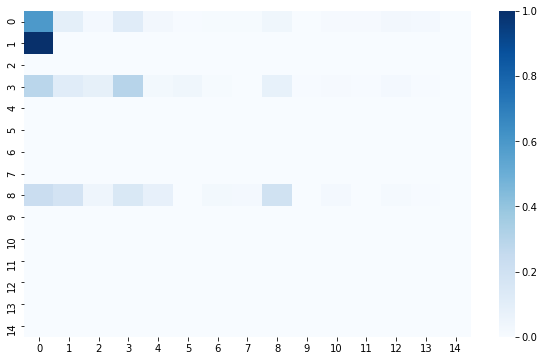

In [40]:
plt.figure(figsize = (10, 6))
sns.heatmap(cf_matrix, cmap = 'Blues')

In [41]:
endTime = time.time()

In [42]:
print(f"Total elapsed time is {datetime.timedelta(seconds = endTime - startTime)}")

Total elapsed time is 0:58:20.389289
